In [4]:
import numpy as np
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (16,7)
mpl.rcParams["image.origin"] = "lower"
mpl.rcParams["image.interpolation"] = "nearest"
mpl.rcParams["image.cmap"] = "hot"

hlss_tbl = Table.read("/Users/keith/astr/research_astr/FOV0/catalogs/MOT_SCA1_roll_0_dither_0x_0y_cut_zcut.txt",
                      format='ascii')
hlss_tbl = hlss_tbl.group_by("MODIMAGE")
hlss_tbl.groups[0].sort("MAG_F1500W", reverse=True)
hlss_tbl.groups[1].sort("MAG_F1500W", reverse=True)

In [11]:
x_loc = 1954
y_loc = 1425
area = 5

condition = (abs(hlss_tbl.groups[1]["X_IMAGE"] - x_loc) <= area) & (abs(hlss_tbl.groups[1]["Y_IMAGE"] - y_loc) <= area)
object = hlss_tbl.groups[1][np.where(condition)]

object.pprint_all()

NUMBER  X_IMAGE   Y_IMAGE  A_IMAGE B_IMAGE THETA_IMAGE MAG_F1500W SPECTEMP  Z  MODIMAGE MODIMAGE_1 MODIMAGE_2
------ --------- --------- ------- ------- ----------- ---------- -------- --- -------- ---------- ----------
197387 1952.9096 1423.7904     8.0     8.0         0.0       13.5   197363 0.0        1    -1000.0    -1000.0


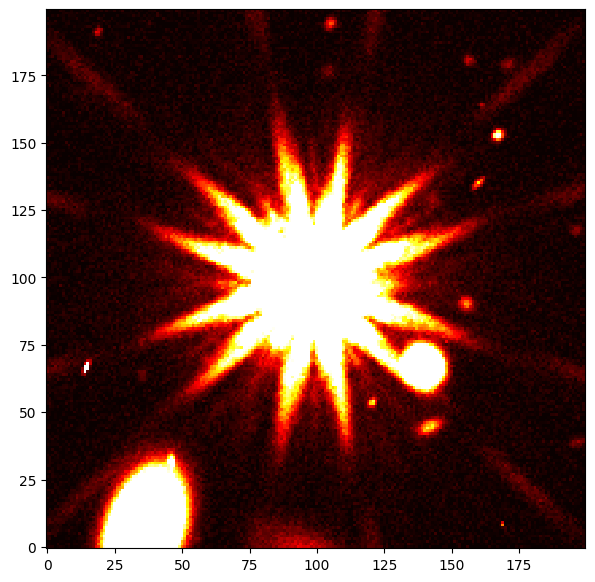

In [3]:
file = fits.open("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits/GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits")
data = file[1].data
file.close()

cut = 20 * area # cutout size
cutout = data[y_loc-cut:y_loc+cut, x_loc-cut:x_loc+cut]

plt.imshow(cutout, vmin=0.25, vmax=2.5)